In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Size of the trajectory
n = 200

# Initialization of arrays
x = np.zeros((n, 1))
V = np.zeros((n, 1))
z = np.zeros((n, 1))

x[0] = 5
V[0] = 1
T = 1

# Variances
sigma_a2 = 0.2 ** 2
sigma_et2 = 20 ** 2

# Generation of normally distributed random noises with zero mathematical expectation and corresponding variances
a = np.random.normal(0, np.sqrt(sigma_a2), n - 1)
et = np.random.normal(0, np.sqrt(sigma_et2), n)

for i in range(1,len(V)):
    V[i] = V[i-1] + a[i - 1] * T
    x[i] = x[i - 1] + V[i - 1] * T + (a[i - 1] ** T) / 2
    z[i] = x[i] + et[i]

In [2]:
#Transition matrix
phi = np.array([[1, T], [0, 1]])
#Input matrix
G = np.array([[(T ** 2) / 2.0], [T]])
#Observation matrix
H = np.array([1, 0])
#Measurement of coordinate
Z = np.zeros((2, n))
#State vector
X = np.array([[5], [1]])

X_ = X
# Generation of true trajectory X
for i in range(1,len(a)+1):
    X = np.hstack((X, phi.dot(X_) + G * a[i - 1]))
    X_ = phi.dot(X_) + G * a[i - 1]

In [3]:
#Covariance matrix Q of state noise
Q = G * G.T * sigma_a2
#Covariance matrix R of measurements noise
R = sigma_et2

#Prediction error covariance matrix
P_1 = np.zeros((2, 2, n))
X_1 = np.zeros((2, n))

#Filtration error covariance matrix
P_ = np.zeros((2, 2, n))
P_[:, :, 0] = [[10000, 0],[0, 10000]]
#Improved estimate
X_ = np.zeros((2, n))
X_[:, 0] = [2, 0]

HT = H.T
#Filter gain, weight of residual
K = np.zeros((2, n))

for i in range(1, n):
    P_1[:, :, i] = (phi.dot(P_[:, :, i - 1])).dot(phi.T) + Q
    
    X_1[:, i] = phi.dot(X_[:, i - 1].reshape(2, 1)).reshape(2)
    K[:, i] = ((P_1[:, :, i].dot(HT)) / ((H.dot(P_1[:, :, i])).dot(HT) + R)).reshape(2)
    
    X_[:, i] = X_1[:, i] + K[:, i] * (z[i] - H.dot(X_1[:, i]))
    P_[:, :, i] = P_1[:, :, i] - (K[:, i].reshape(2, 1) * H).dot(P_1[:, :, i])
    
K = np.delete(K, 0, axis = 1)

In [4]:
X.shape

(2, 200)

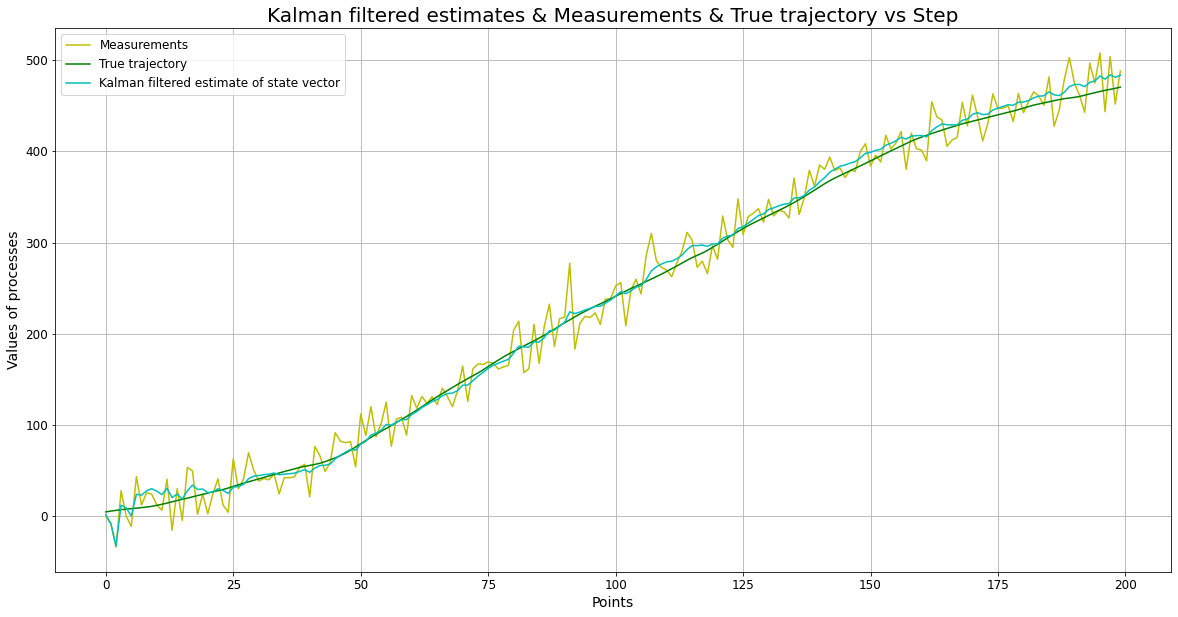

In [5]:
# Plotting measurements, true values of process, kalman filtered estimate
fig, a = plt.subplots(figsize=(20,10))
a.set_title("Kalman filtered estimates & Measurements & True trajectory vs Step", fontsize = 20)
a.set_xlabel("Points", fontsize = 14)
a.set_ylabel("Values of processes", fontsize = 14)
a.plot(z, label = "Measurements", color = "y")
a.plot(X[0,:], label = "True trajectory", color = "g")
a.plot(X_[0,:], label = "Kalman filtered estimate of state vector", color = "c")
a.tick_params(labelsize = 12)
a.legend(fontsize = 12)
a.grid()

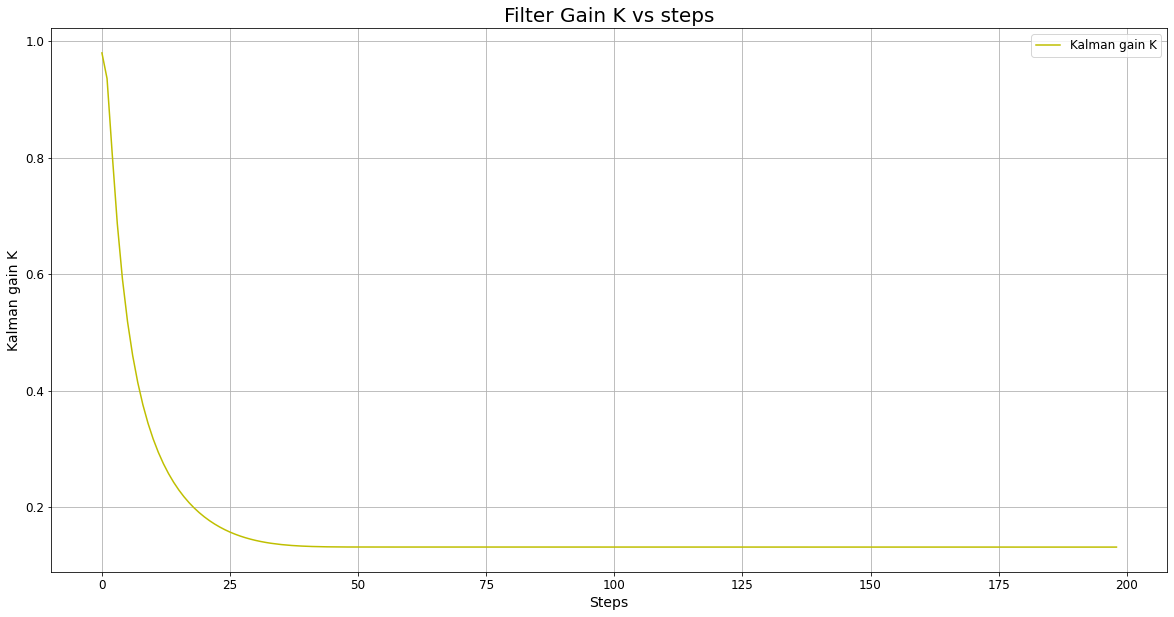

In [6]:
# Plotting filter gain K over the whole filtration interval
fig, b = plt.subplots(figsize=(20,10))
b.set_title("Filter Gain K vs steps", fontsize = 20)
b.set_xlabel("Steps", fontsize = 14)
b.set_ylabel("Kalman gain K", fontsize = 14)
b.plot(K[0,:], label = "Kalman gain K", color = "y")
b.tick_params(labelsize = 12)
b.legend(fontsize = 12)
b.grid()

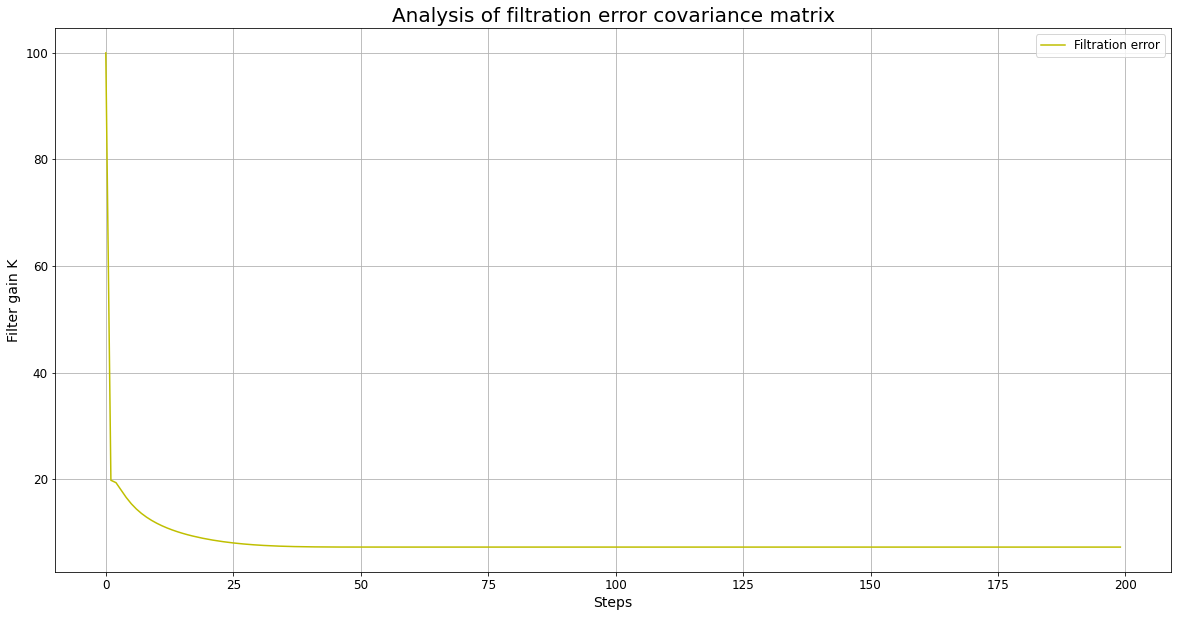

In [7]:
# Analysis of filtration error covariance matrix

P_sqr = np.sqrt(P_[0, 0, :])

fig, c = plt.subplots(figsize=(20,10))
c.set_title("Analysis of filtration error covariance matrix", fontsize = 20)
c.set_xlabel("Steps", fontsize = 14)
c.set_ylabel("Filter gain K", fontsize = 14)
c.plot(P_sqr, label = "Filtration error", color = "y")
c.tick_params(labelsize = 12)
c.legend(fontsize = 12)
c.grid()

In [8]:
#Add to the code extrapolation on m = 7 steps ahead on every time step
X_7 = np.zeros((2, n + 7))

for i in range(n):
    X_7[:, i + 7] = phi.dot(phi).dot(phi).dot(phi).dot(phi).dot(phi).dot(X_[:,i].reshape(2, 1)).reshape(2)

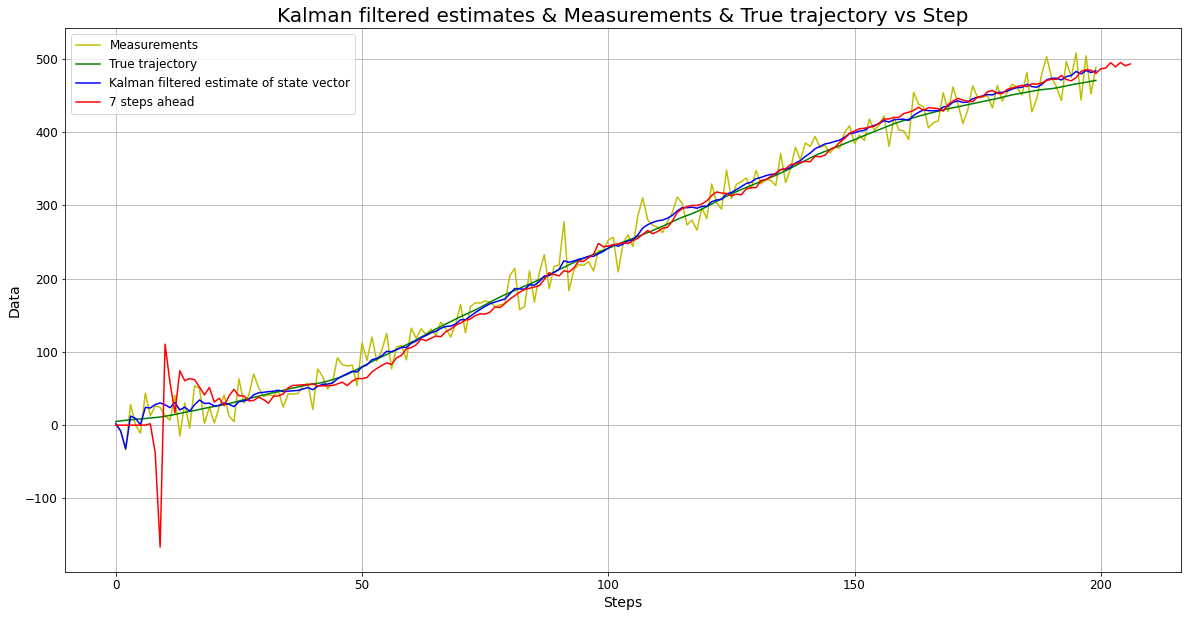

In [9]:
# Plotting measurements, true values of process, kalman filtered estimate and 7 steps ahead
fig, d = plt.subplots(figsize=(20,10))
d.set_title("Kalman filtered estimates & Measurements & True trajectory vs Step", fontsize = 20)
d.set_xlabel("Steps", fontsize = 14)
d.set_ylabel("Data", fontsize = 14)
d.plot(z, label = "Measurements", color = "y")
d.plot(X[0,:], label = "True trajectory", color = "g")
d.plot(X_[0,:], label = "Kalman filtered estimate of state vector", color = "b")
d.plot(X_7[0,:], label = "7 steps ahead", color = "r")
d.tick_params(labelsize = 12)
d.legend(fontsize = 12)
d.grid()

In [10]:
#Estimation of dynamics of mean-squared error of estimation over observation interval.
#Plot the final error and check when it becomes almost constant and estimation accuracy doesn't increase anymore.
#Compare mean-squared error of filtered estimate of coordinate with standard deviation of measurement errors.
N = 200
M = 500

Error_1step = np.zeros((2, N, M))
Error_7steps = np.zeros((2, N, M))

for k in range(M):

    # Initialization of arrays
    x8 = np.zeros((N, 1))
    V8 = np.zeros((N, 1))
    z8 = np.zeros((N, 1))

    x8[0] = 5
    V8[0] = 1
    T8 = 1

    # Variances
    sigma_a2 = 0.2 ** 2
    sigma_eta2 = 20 ** 2

    # Generation of normally distributed random noises with zero mathematical expectation and corresponding variances
    a8 = np.random.normal(0, np.sqrt(sigma_a2), N - 1)
    eta8 = np.random.normal(0, np.sqrt(sigma_et2), N)

    # Generation of V=arrays
    for i in range(1, len(V8)):
        V8[i] = V8[i - 1] + a8[i - 1] * T8
        x8[i] = x8[i - 1] + V8[i - 1] * T8 + a8[i - 1] * (T8 ** 2) / 2
        z8[i] = x8[i] + eta8[i]

    #Transition matrix    
    phi8 = np.array([[1, T8], [0, 1]])
    #Input matrix
    G8 = np.array([[(T8 ** 2) / 2], [T8]])
    #Observation matrix
    H8 = np.array([1, 0])
    #Measurement of coordinate
    Z8 = np.zeros((2, N))
    #State vector
    X8 = np.array([[5], [1]])

    X8_ = X8
    # Generation of true trajectory X
    for i in range(1, len(a8) + 1):
        X8 = np.hstack((X8, phi8.dot(X8_) + G8 * a8[i - 1]))
        X8_ = phi8.dot(X8_) + G8 * a8[i - 1]
    
    #Covariance matrix Q of state noise
    Q8 = G8 * G8.T * sigma_a2
    #Covariance matrix R of measurements noise
    R8 = sigma_et2

    #Prediction error covariance matrix
    P8_1 = np.zeros((2, 2, N))
    X8_1 = np.zeros((2, N))
    
    #Filtration error covariance matrix
    P8_ = np.zeros((2, 2, N))
    P8_[:, :, 0] = [[10000, 0], [0, 10000]]
    #Improved estimate
    X8_ = np.zeros((2, n))
    X8_[:, 0] = [2, 0]

    HT8 = H8.T
    #Filter gain, weight of residual
    K8 = np.zeros((2, N))

    for i in range(1, N):
        P8_1[:, :, i] = (phi8.dot(P8_[:, :, i - 1])).dot(phi8.T) + Q8

        X8_1[:, i] = phi8.dot(X8_[:, i - 1].reshape(2, 1)).reshape(2)
        K8[:, i] = ((P8_1[:, :, i].dot(HT8)) / ((H8.dot(P8_1[:, :, i])).dot(HT8) + R8)).reshape(2)

        X8_[:, i] = X8_1[:, i] + K8[:, i] * (z8[i] - H8.dot(X8_1[:, i]))
        P8_[:, :, i] = P8_1[:, :, i] - (K8[:, i].reshape(2, 1) * H8).dot(P8_1[:, :, i])

    K8 = np.delete(K8, 0, axis = 1)
    
    X8_7 = np.zeros((2, N + 7))

    for i in range(N):
        X8_7[:, i + 7] = phi8.dot(phi8).dot(phi8).dot(phi8).dot(phi8).dot(phi8).dot(X8_[:, i].reshape(2, 1)).reshape(2)
    
    Error_1step[:, :, k] = (X8 - X8_) ** 2
    Error_7steps[:, :, k] = (X8 - X8_7[:, :N]) ** 2

In [11]:
Final_err_1step = np.sqrt(np.sum(Error_1step, axis = 2) / (M - 1))
Final_err_7steps = np.sqrt(np.sum(Error_7steps, axis = 2) / (M - 1))

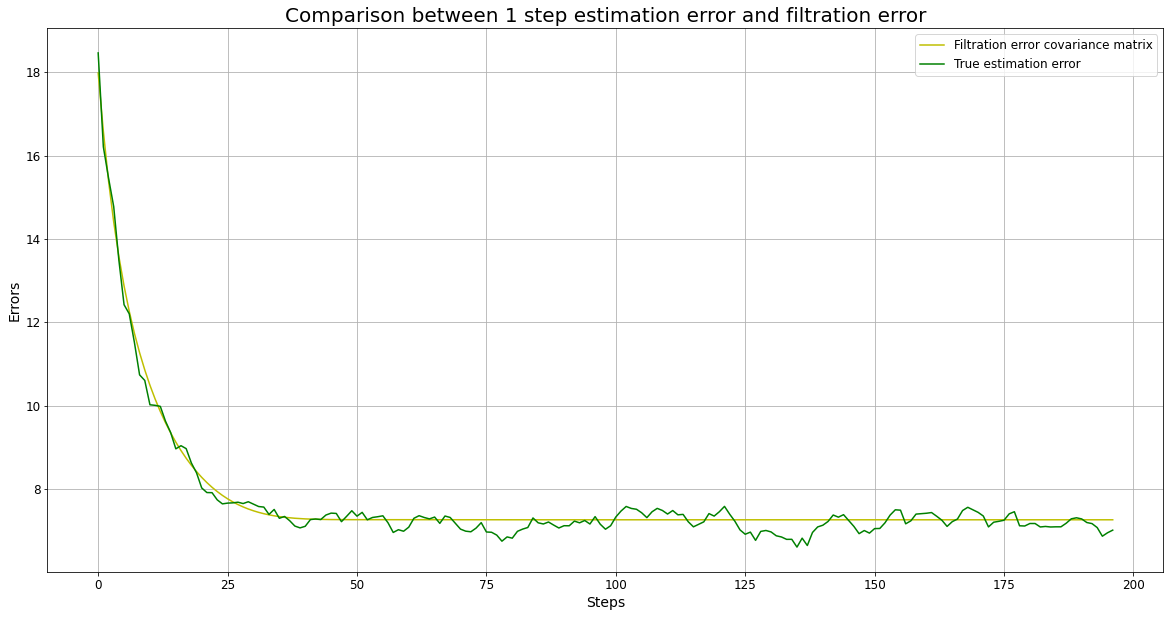

In [12]:
# Plotting filtered and predicted (extrapolated 1step and 7step ahead)
fig, e = plt.subplots(figsize=(20,10))
e.set_title("Comparison between 1 step estimation error and filtration error", fontsize = 20)
e.set_xlabel("Steps", fontsize = 14)
e.set_ylabel("Errors", fontsize = 14)
e.plot(np.sqrt(P8_[0, 0, 3 :]), label = "Filtration error covariance matrix", color = "y")
e.plot(Final_err_1step[0, 3:], label = "True estimation error", color = "g")
e.tick_params(labelsize = 12)
e.legend(fontsize = 12)
e.grid()

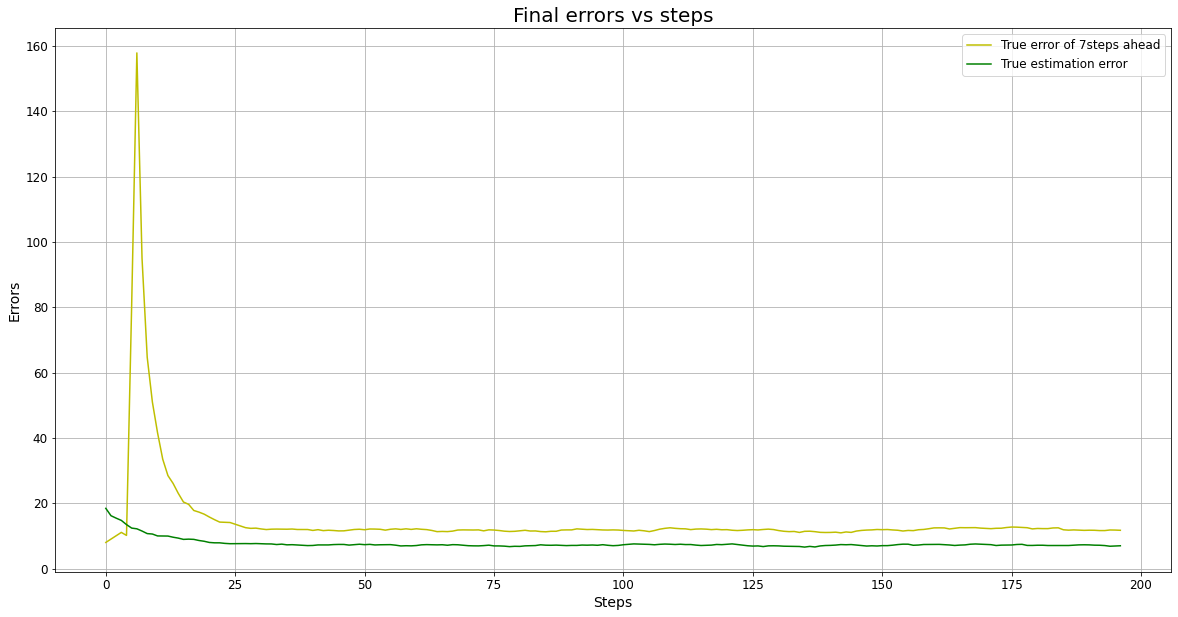

In [13]:
fig, f = plt.subplots(figsize=(20,10))
f.set_title("Final errors vs steps", fontsize = 20)
f.set_xlabel("Steps", fontsize = 14)
f.set_ylabel("Errors", fontsize = 14)
f.plot(Final_err_7steps[0, 3:], label = "True error of 7steps ahead", color = "y")
f.plot(Final_err_1step[0, 3:], label = "True estimation error", color = "g")
f.tick_params(labelsize = 12)
f.legend(fontsize = 12)
f.grid()

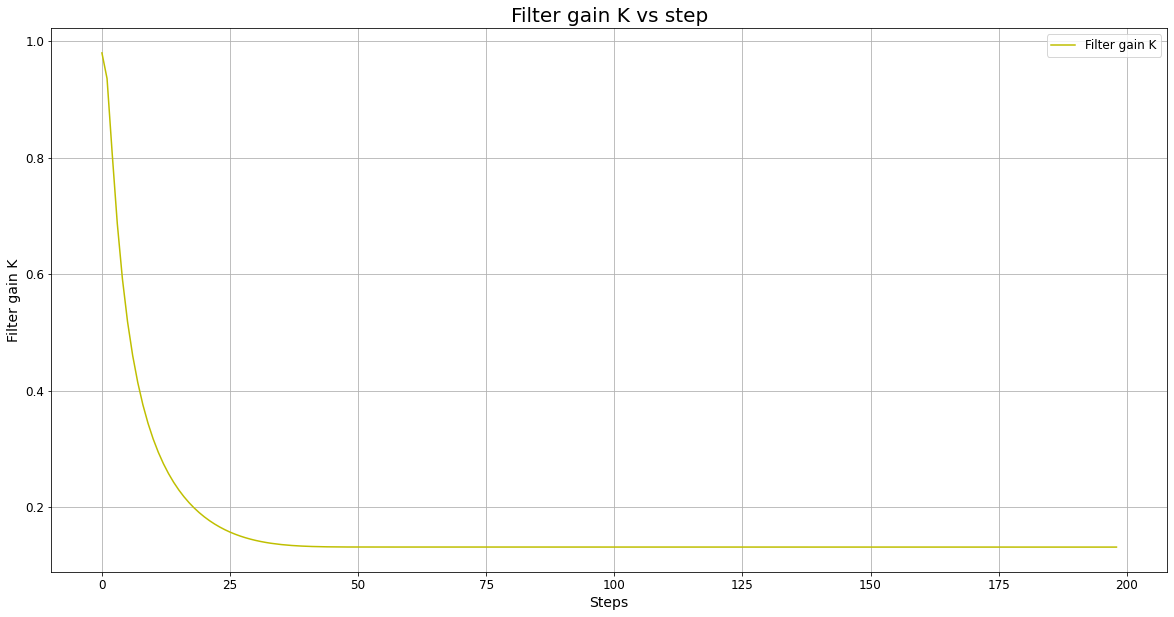

In [14]:
fig, g = plt.subplots(figsize=(20,10))
g.set_title("Filter gain K vs step", fontsize = 20)
g.set_xlabel("Steps", fontsize = 14)
g.set_ylabel("Filter gain K", fontsize = 14)
g.plot(K8[0,:], label = "Filter gain K", color = "y")
g.tick_params(labelsize = 12)
g.legend(fontsize = 12)
g.grid()

In [15]:
N = 200
M = 500

Error10_1step = np.zeros((2, N, M))
Error10_7steps = np.zeros((2, N, M))

for k in range(M):

    # Initialization of arrays
    x10 = np.zeros((N, 1))
    V10 = np.zeros((N, 1))
    z10 = np.zeros((N, 1))

    x10[0] = 5
    V10[0] = 1
    T10 = 1

    # Variances
    sigma_a2 = 0.2 ** 2
    sigma_eta2 = 20 ** 2

    # Generation of normally distributed random noises with zero mathematical expectation and corresponding variances
    a10 = np.random.normal(0, np.sqrt(sigma_a2), N - 1)
    eta10 = np.random.normal(0, np.sqrt(sigma_et2), N)

    # Generation of arrays
    for i in range(1, len(V10)):
        V10[i] = V10[i - 1] + a10[i - 1] * T10
        x10[i] = x10[i - 1] + V10[i - 1] * T10 + a10[i - 1] * (T10 ** 2) / 2
        z10[i] = x10[i] + eta10[i]
        
    #Transition matrix 
    phi10 = np.array([[1, T10], [0, 1]])
    #Input matrix
    G10 = np.array([[(T10 ** 2) / 2], [T10]])
    #Observation matrix
    H10 = np.array([1, 0])
    #Measurement of coordinate
    Z10 = np.zeros((2, N))
    #State vector
    X10 = np.array([[5], [1]])

    X10_ = X10
    # Generation of true trajectory X
    for i in range(1, len(a10) + 1):
        X10 = np.hstack((X10, phi10.dot(X10_) + G10 * a10[i - 1]))
        X10_ = phi10.dot(X10_) + G10 * a10[i - 1]
        
    #Covariance matrix Q of state noise
    Q10 = G10 * G10.T * sigma_a2
    #Covariance matrix R of measurements noise
    R10 = sigma_et2
    
    #Prediction error covariance matrix
    P10_1 = np.zeros((2, 2, N))
    X10_1 = np.zeros((2, N))
    
    #Filtration error covariance matrix
    P10_ = np.zeros((2, 2, N))
    P10_[:, :, 0] = [[100, 0], [0, 100]]
    #Improved estimate
    X10_ = np.zeros((2, N))
    X10_[:, 0] = [2, 0]

    HT10 = H10.T
    #Filter gain, weight of residual
    K10 = np.zeros((2, N))

    for i in range(1, N):
        P10_1[:, :, i] = (phi10.dot(P10_[:, :, i - 1])).dot(phi10.T) + Q10

        X10_1[:, i] = phi10.dot(X10_[:, i - 1].reshape(2, 1)).reshape(2)
        K10[:, i] = ((P10_1[:, :, i].dot(HT10)) / ((H10.dot(P10_1[:, :, i])).dot(HT10) + R10)).reshape(2)

        X10_[:, i] = X10_1[:, i] + K10[:, i] * (z10[i] - H10.dot(X10_1[:, i]))
        P10_[:, :, i] = P10_1[:, :, i] - (K10[:, i].reshape(2, 1) * H10).dot(P10_1[:, :, i])

    K10 = np.delete(K10, 0, axis = 1)

    X10_7 = np.zeros((2, N + 7))

    for i in range(N):
        X10_7[:, i + 7] = phi10.dot(phi10).dot(phi10).dot(phi10).dot(phi10).dot(phi10).dot(X10_[:, i].reshape(2, 1)).reshape(2)
    
    Error10_1step[:, :, k] = (X10 - X10_) ** 2
    Error10_7steps[:, :, k] = (X10 - X10_7[:, :N]) ** 2

In [16]:
Final_err10_1step = np.sqrt(np.sum(Error10_1step, axis = 2) / (M - 1))
Final_err10_7steps = np.sqrt(np.sum(Error10_7steps, axis = 2) / (M - 1))

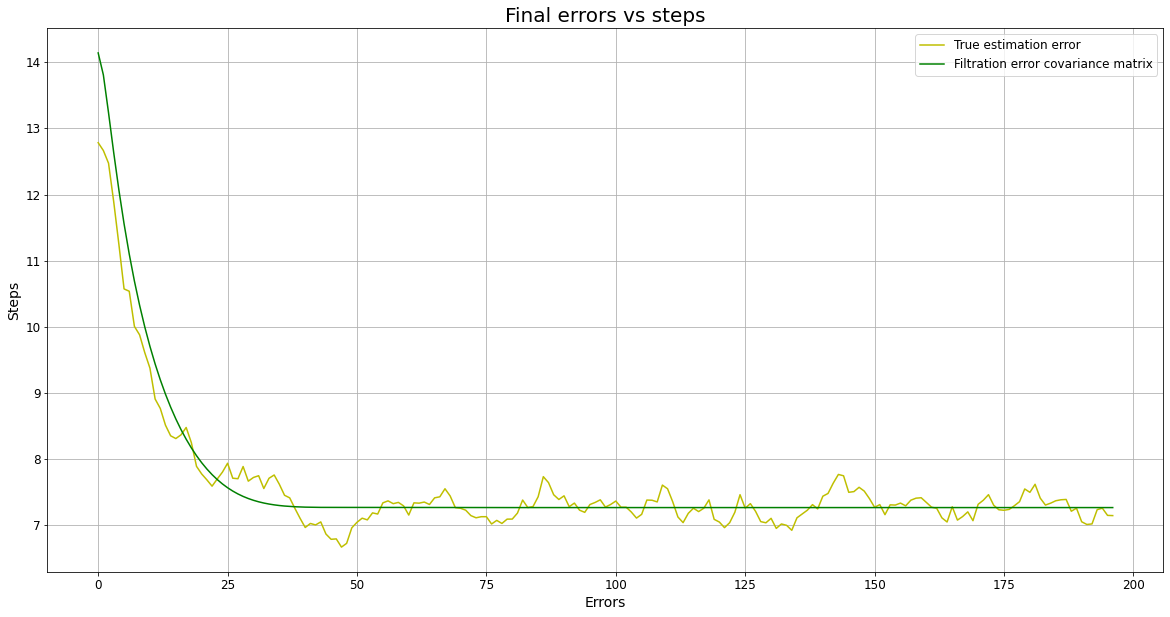

In [17]:
fig, h = plt.subplots(figsize=(20,10))
h.set_title("Final errors vs steps", fontsize = 20)
h.set_xlabel("Errors", fontsize = 14)
h.set_ylabel("Steps", fontsize = 14)
h.plot(Final_err10_1step[0, 3:], label = "True estimation error", color = "y")
h.plot(np.sqrt(P10_[0, 0, 3 :]), label = "Filtration error covariance matrix", color = "g")
h.tick_params(labelsize = 12)
h.legend(fontsize = 12)
h.grid()

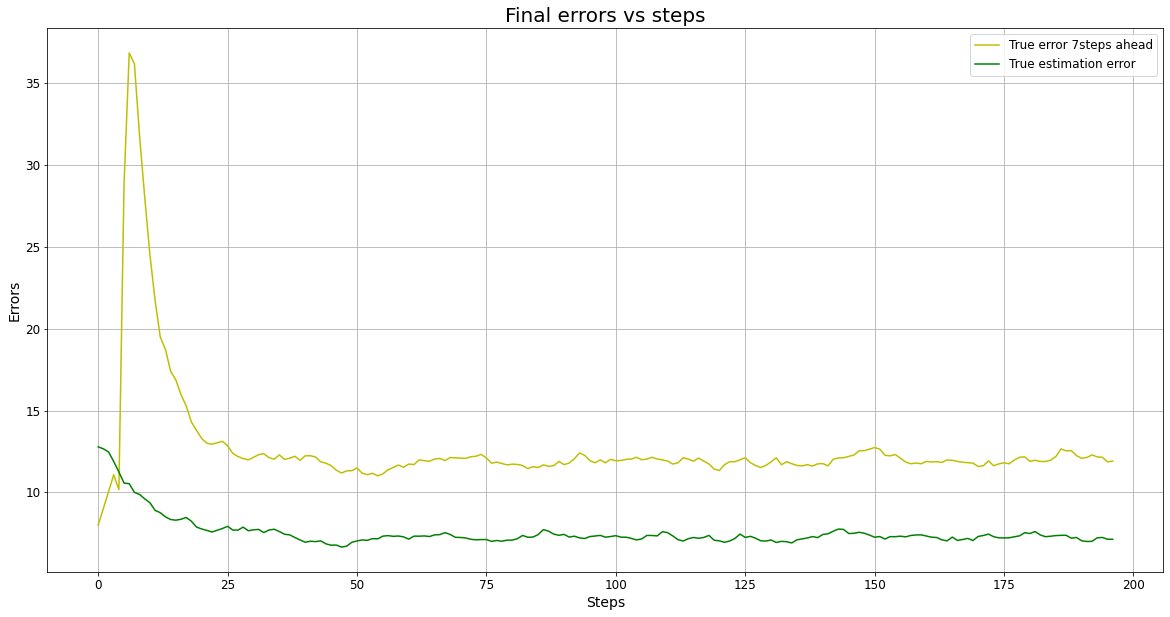

In [18]:
fig, i = plt.subplots(figsize=(20,10))
i.set_title("Final errors vs steps", fontsize = 20)
i.set_xlabel("Steps", fontsize = 14)
i.set_ylabel("Errors", fontsize = 14)
i.plot(Final_err10_7steps[0, 3:], label = "True error 7steps ahead", color = "y")
i.plot(Final_err10_1step[0, 3:], label = "True estimation error", color = "g")
i.tick_params(labelsize = 12)
i.legend(fontsize = 12)
i.grid()

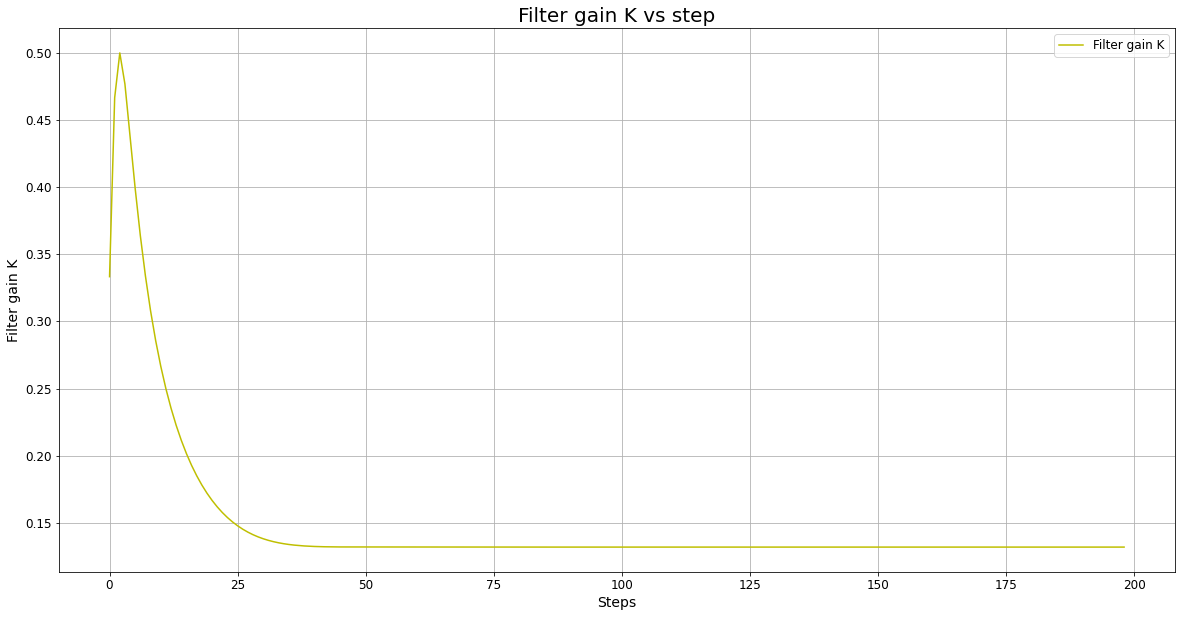

In [19]:
fig, j = plt.subplots(figsize=(20,10))
j.set_title("Filter gain K vs step", fontsize = 20)
j.set_xlabel("Steps", fontsize = 14)
j.set_ylabel("Filter gain K", fontsize = 14)
j.plot(K10[0,:], label = "Filter gain K", color = "y")
j.tick_params(labelsize = 12)
j.legend(fontsize = 12)
j.grid()

In [20]:
N = 200
M = 500

Error12 = np.zeros((2, N, M))

for k in range(M):

    # Initialization of arrays
    x12 = np.zeros((N, 1))
    V12 = np.zeros((N, 1))
    z12 = np.zeros((N, 1))

    x12[0] = 5
    V12[0] = 1
    T12 = 1

    # Variances
    sigma_a2 = 0
    sigma_eta2 = 20 ** 2

    # Generation of normally distributed random noises with zero mathematical expectation and corresponding variances
    a12 = np.random.normal(0, np.sqrt(sigma_a2), N - 1)
    eta12 = np.random.normal(0, np.sqrt(sigma_et2), N)

    # Generation of arrays
    for i in range(1, len(V10)):
        V12[i] = V12[i - 1] + a12[i - 1] * T12
        x12[i] = x12[i - 1] + V12[i - 1] * T12 + a12[i - 1] * (T12 ** 2) / 2
        z12[i] = x12[i] + eta12[i]
        
    #Transition matrix 
    phi12 = np.array([[1, T12], [0, 1]])
    #Input matrix
    G12 = np.array([[(T12 ** 2) / 2], [T12]])
    #Observation matrix
    H12 = np.array([1, 0])
    #Measurement of coordinate
    Z12 = np.zeros((2, N))
    #State vector
    X12 = np.array([[5], [1]])

    X12_ = X12
    # Generation of true trajectory X
    for i in range(1, len(a12) + 1):
        X12 = np.hstack((X12, phi12.dot(X12_) + G12 * a12[i - 1]))
        X12_ = phi12.dot(X12_) + G12 * a12[i - 1]
        
    #Covariance matrix Q of state noise
    Q12 = G12 * G12.T * sigma_a2
    #Covariance matrix R of measurements noise
    R12 = sigma_et2
    
    #Prediction error covariance matrix
    P12_1 = np.zeros((2, 2, N))
    X12_1 = np.zeros((2, N))
    
    #Filtration error covariance matrix
    P12_ = np.zeros((2, 2, N))
    P12_[:, :, 0] = [[10000, 0], [0, 10000]]
    #Improved estimate
    X12_ = np.zeros((2, N))
    X12_[:, 0] = [2, 0]

    HT12 = H12.T
    #Filter gain, weight of residual
    K12 = np.zeros((2, N))

    for i in range(1, N):
        P12_1[:, :, i] = (phi12.dot(P12_[:, :, i - 1])).dot(phi12.T) + Q12

        X12_1[:, i] = phi12.dot(X12_[:, i - 1].reshape(2, 1)).reshape(2)
        K12[:, i] = ((P12_1[:, :, i].dot(HT12)) / ((H12.dot(P12_1[:, :, i])).dot(HT12) + R12)).reshape(2)

        X12_[:, i] = X12_1[:, i] + K12[:, i] * (z12[i] - H12.dot(X12_1[:, i]))
        P12_[:, :, i] = P12_1[:, :, i] - (K12[:, i].reshape(2, 1) * H12).dot(P12_1[:, :, i])

    K12 = np.delete(K12, 0, axis = 1)
    
    Error12[:, :, k] = (X12 - X12_) ** 2
    
Final_err12 = np.sqrt(np.sum(Error12, axis = 2) / (M - 1))

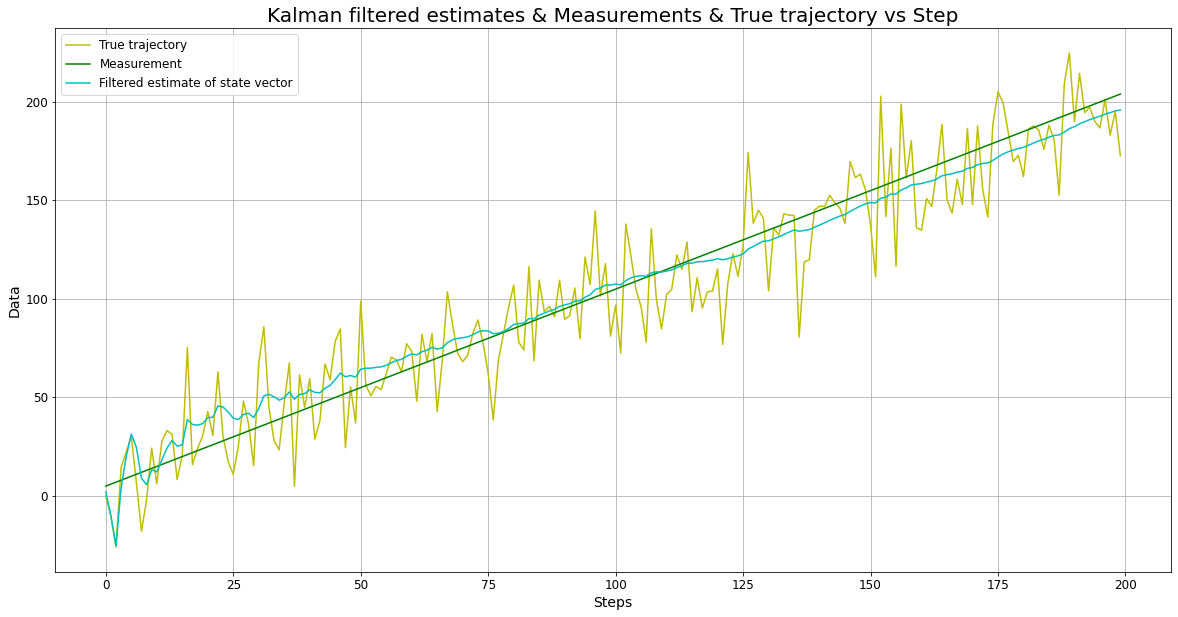

In [21]:
fig, k1 = plt.subplots(figsize=(20,10))
k1.set_title("Kalman filtered estimates & Measurements & True trajectory vs Step", fontsize = 20)
k1.set_xlabel("Steps", fontsize = 14)
k1.set_ylabel("Data", fontsize = 14)
k1.plot(z12, label = "True trajectory", color = "y")
k1.plot(X12[0,:], label = "Measurement", color = "g")
k1.plot(X12_[0,:], label = "Filtered estimate of state vector", color = "c")
k1.tick_params(labelsize = 12)
k1.legend(fontsize = 12)
k1.grid()

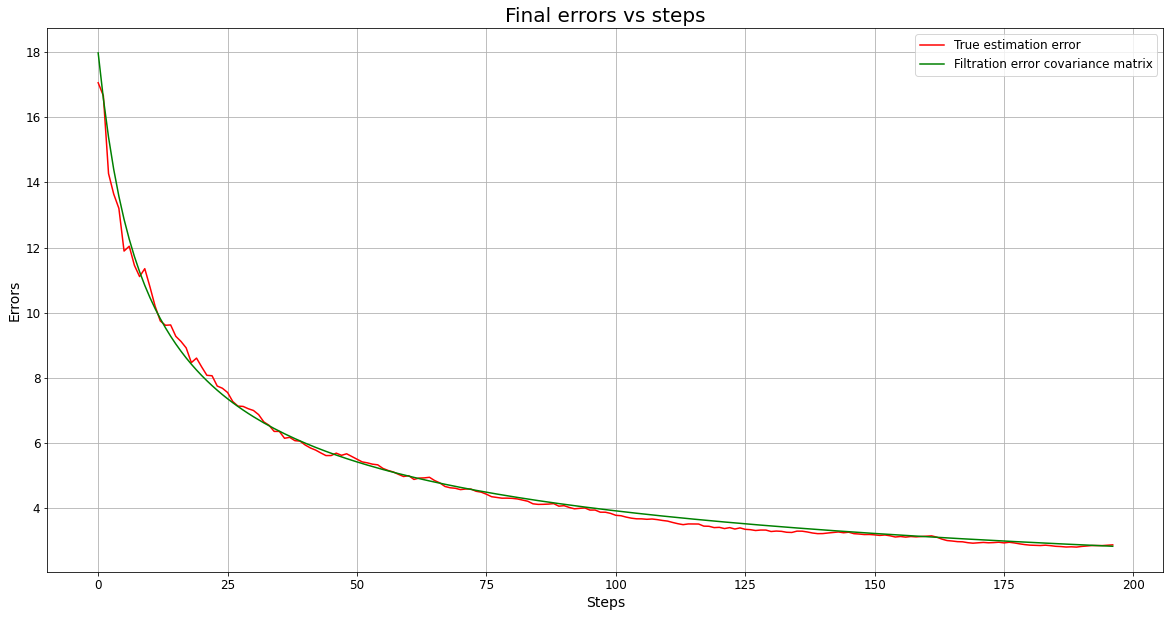

In [22]:
fig, k = plt.subplots(figsize=(20,10))
k.set_title("Final errors vs steps", fontsize = 20)
k.set_xlabel("Steps", fontsize = 14)
k.set_ylabel("Errors", fontsize = 14)
k.plot(Final_err12[0, 3:], label = "True estimation error", color = "r")
k.plot(np.sqrt(P12_[0, 0, 3 :]), label = "Filtration error covariance matrix", color = "g")
k.tick_params(labelsize = 12)
k.legend(fontsize = 12)
k.grid()

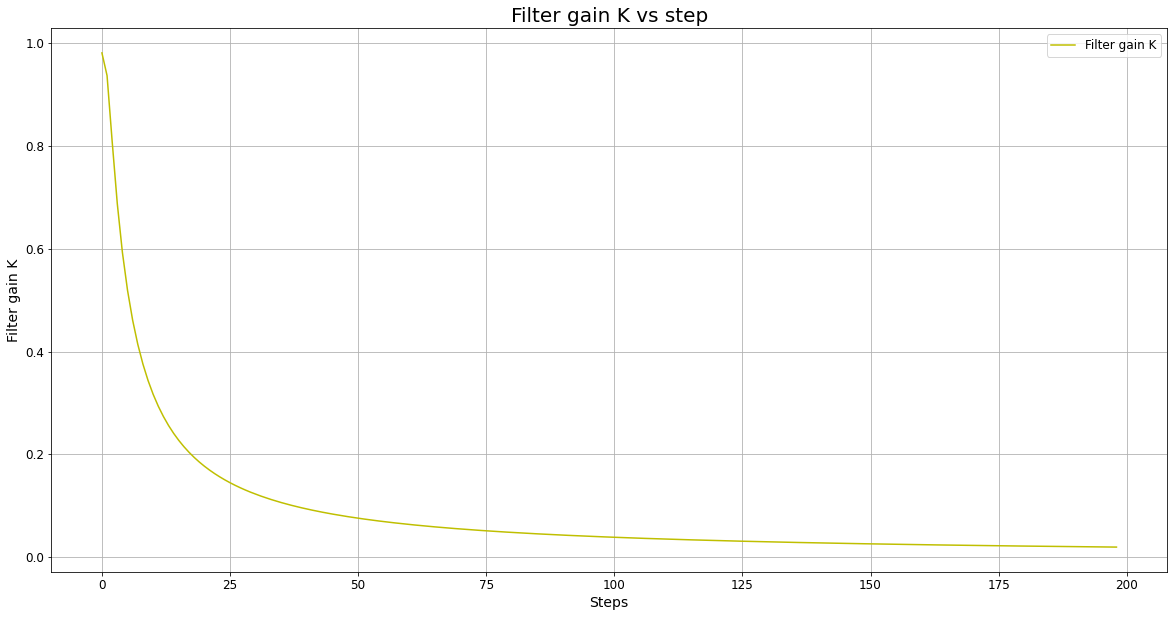

In [23]:
fig, l = plt.subplots(figsize=(20,10))
l.set_title("Filter gain K vs step", fontsize = 20)
l.set_xlabel("Steps", fontsize = 14)
l.set_ylabel("Filter gain K", fontsize = 14)
l.plot(K12[0,:], label = "Filter gain K", color = "y")
l.tick_params(labelsize = 12)
l.legend(fontsize = 12)
l.grid()

In [24]:
N = 200
M = 500

Error13_1step = np.zeros((2, N, M))
Error13_7steps = np.zeros((2, N, M))

for k in range(M):

    # Initialization of arrays
    x13 = np.zeros((N, 1))
    V13 = np.zeros((N, 1))
    z13 = np.zeros((N, 1))

    x13[0] = 5
    V13[0] = 1
    T13 = 1

    # Variances
    sigma_a2 = 0.2 ** 2
    sigma_eta2 = 20 ** 2

    # Generation of normally distributed random noises with zero mathematical expectation and corresponding variances
    a13 = np.random.normal(0, np.sqrt(sigma_a2), N - 1)
    eta13 = np.random.normal(0, np.sqrt(sigma_et2), N)

    # Generation of arrays
    for i in range(1, len(V10)):
        V13[i] = V13[i - 1] + a13[i - 1] * T13
        x13[i] = x13[i - 1] + V13[i - 1] * T13 + a13[i - 1] * (T13 ** 2) / 2
        z13[i] = x13[i] + eta13[i]
        
    #Transition matrix 
    phi13 = np.array([[1, T13], [0, 1]])
    #Input matrix
    G13 = np.array([[(T13 ** 2) / 2], [T13]])
    #Observation matrix
    H13 = np.array([1, 0])
    #Measurement of coordinate
    Z13 = np.zeros((2, N))
    #State vector
    X13 = np.array([[5], [1]])

    X13_ = X13
    # Generation of true trajectory X
    for i in range(1, len(a13) + 1):
        X13 = np.hstack((X13, phi13.dot(X13_) + G13 * a13[i - 1]))
        X13_ = phi13.dot(X13_) + G13 * a13[i - 1]
        
    #Covariance matrix Q of state noise
    Q13 = 0
    #Covariance matrix R of measurements noise
    R13 = sigma_et2
    
    #Prediction error covariance matrix
    P13_1 = np.zeros((2, 2, N))
    X13_1 = np.zeros((2, N))
    
    #Filtration error covariance matrix
    P13_ = np.zeros((2, 2, N))
    P13_[:, :, 0] = [[10000, 0], [0, 10000]]
    #Improved estimate
    X13_ = np.zeros((2, N))
    X13_[:, 0] = [2, 0]

    HT13 = H13.T
    #Filter gain, weight of residual
    K13 = np.zeros((2, N))

    for i in range(1, N):
        P13_1[:, :, i] = (phi13.dot(P13_[:, :, i - 1])).dot(phi13.T) + Q13

        X13_1[:, i] = phi13.dot(X13_[:, i - 1].reshape(2, 1)).reshape(2)
        K13[:, i] = ((P13_1[:, :, i].dot(HT13)) / ((H13.dot(P13_1[:, :, i])).dot(HT13) + R13)).reshape(2)

        X13_[:, i] = X13_1[:, i] + K13[:, i] * (z13[i] - H13.dot(X13_1[:, i]))
        P13_[:, :, i] = P13_1[:, :, i] - (K13[:, i].reshape(2, 1) * H13).dot(P13_1[:, :, i])

    K13 = np.delete(K13, 0, axis = 1)
    
    X13_7 = np.zeros((2, N + 7))

    for i in range(N):
        X13_7[:, i + 7] = phi13.dot(phi13).dot(phi13).dot(phi13).dot(phi13).dot(phi13).dot(X13_[:, i].reshape(2, 1)).reshape(2)
    
    Error13_1step[:, :, k] = (X13 - X13_) ** 2
    Error13_7steps[:, :, k] = (X13 - X13_7[:, :N]) ** 2
    
Final_err13_1 = np.sqrt(np.sum(Error13_1step, axis = 2) / (M - 1))
Final_err13_7 = np.sqrt(np.sum(Error13_7steps, axis = 2) / (M - 1))

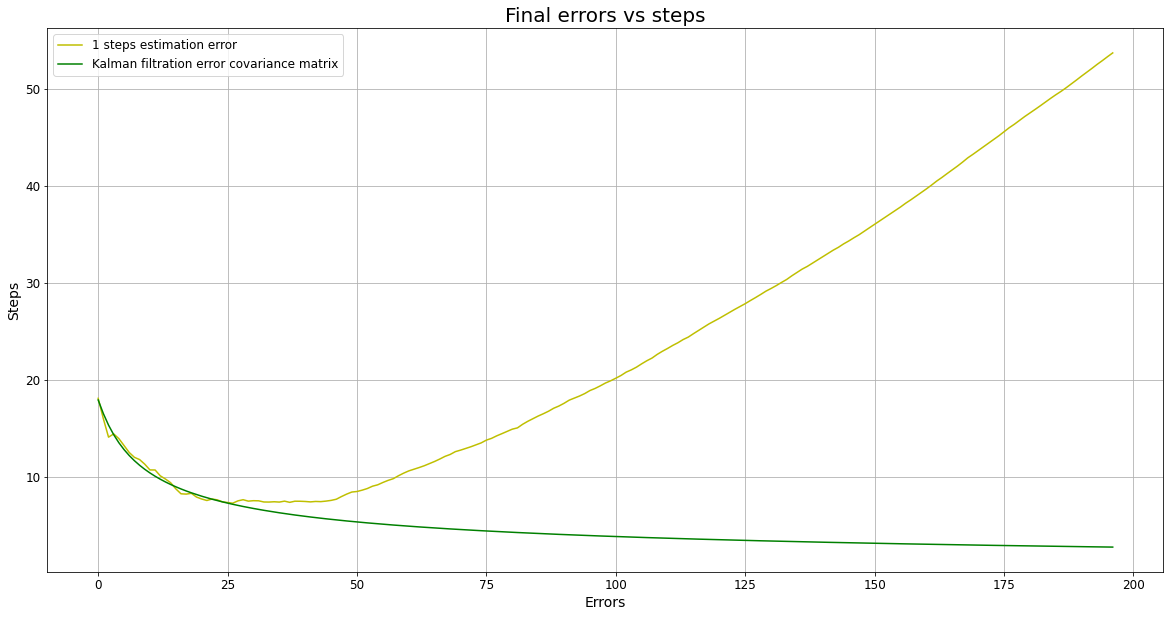

In [25]:
fig, m = plt.subplots(figsize=(20,10))
m.set_title("Final errors vs steps", fontsize = 20)
m.set_xlabel("Errors", fontsize = 14)
m.set_ylabel("Steps", fontsize = 14)
m.plot(Final_err13_1[0, 3:], label = "1 steps estimation error", color = "y")
m.plot(np.sqrt(P13_[0, 0, 3 :]), label = "Kalman filtration error covariance matrix", color = "g")
m.tick_params(labelsize = 12)
m.legend(fontsize = 12)
m.grid()

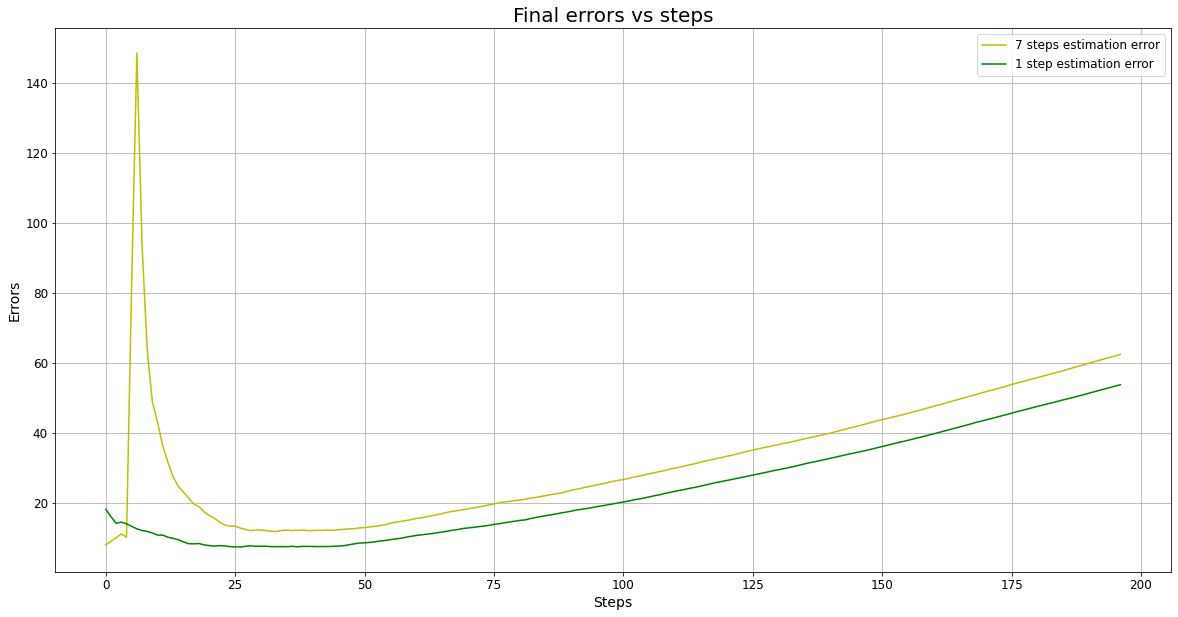

In [26]:
fig, n = plt.subplots(figsize=(20,10))
n.set_title("Final errors vs steps", fontsize = 20)
n.set_xlabel("Steps", fontsize = 14)
n.set_ylabel("Errors", fontsize = 14)
n.plot(Final_err13_7[0, 3:], label = "7 steps estimation error", color = "y")
n.plot(Final_err13_1[0, 3:], label = "1 step estimation error", color = "g")
n.tick_params(labelsize = 12)
n.legend(fontsize = 12)
n.grid()

In [27]:
#Analyze how the relationship between state and measurement noise affect time when filter gain become almost constant and estimation
#accuracy doesn't increase anymore
N = 200
M = 500

Error14_1step = np.zeros((2, N, M))
Error14_7steps = np.zeros((2, N, M))

for k in range(M):

    # Initialization of arrays
    x14 = np.zeros((N, 1))
    V14 = np.zeros((N, 1))
    z14 = np.zeros((N, 1))

    x14[0] = 5
    V14[0] = 1
    T14 = 1

    # Variances
    sigma_a2 = 1
    sigma_eta2 = 20 ** 2

    # Generation of normally distributed random noises with zero mathematical expectation and corresponding variances
    a14 = np.random.normal(0, np.sqrt(sigma_a2), N - 1)
    eta14 = np.random.normal(0, np.sqrt(sigma_et2), N)

    # Generation of V=arrays
    for i in range(1, len(V8)):
        V14[i] = V14[i - 1] + a14[i - 1] * T14
        x14[i] = x14[i - 1] + V14[i - 1] * T14 + a14[i - 1] * (T14 ** 2) / 2
        z14[i] = x14[i] + eta14[i]

    #Transition matrix    
    phi14 = np.array([[1, T14], [0, 1]])
    #Input matrix
    G14 = np.array([[(T14 ** 2) / 2], [T14]])
    #Observation matrix
    H14 = np.array([1, 0])
    #Measurement of coordinate
    Z14 = np.zeros((2, N))
    #State vector
    X14 = np.array([[5], [1]])

    X14_ = X14
    # Generation of true trajectory X
    for i in range(1, len(a14) + 1):
        X14 = np.hstack((X14, phi14.dot(X14_) + G14 * a14[i - 1]))
        X14_ = phi14.dot(X14_) + G14 * a14[i - 1]
    
    #Covariance matrix Q of state noise
    Q14 = G14 * G14.T * sigma_a2
    #Covariance matrix R of measurements noise
    R14 = sigma_et2

    #Prediction error covariance matrix
    P14_1 = np.zeros((2, 2, N))
    X14_1 = np.zeros((2, N))
    
    #Filtration error covariance matrix
    P14_ = np.zeros((2, 2, N))
    P14_[:, :, 0] = [[10000, 0], [0, 10000]]
    #Improved estimate
    X14_ = np.zeros((2, N))
    X14_[:, 0] = [2, 0]

    HT14 = H14.T
    #Filter gain, weight of residual
    K14 = np.zeros((2, N))

    for i in range(1, N):
        P14_1[:, :, i] = (phi14.dot(P14_[:, :, i - 1])).dot(phi14.T) + Q14

        X14_1[:, i] = phi14.dot(X14_[:, i - 1].reshape(2, 1)).reshape(2)
        K14[:, i] = ((P14_1[:, :, i].dot(HT14)) / ((H14.dot(P14_1[:, :, i])).dot(HT14) + R14)).reshape(2)

        X14_[:, i] = X14_1[:, i] + K14[:, i] * (z14[i] - H14.dot(X14_1[:, i]))
        P14_[:, :, i] = P14_1[:, :, i] - (K14[:, i].reshape(2, 1) * H14).dot(P14_1[:, :, i])

    K14 = np.delete(K14, 0, axis = 1)

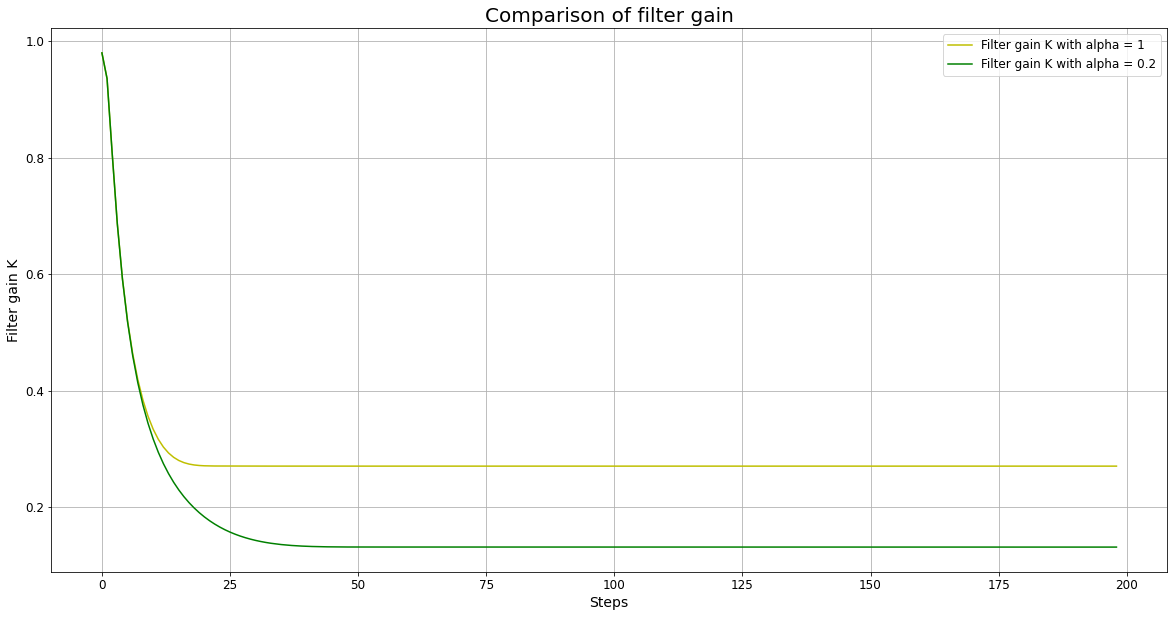

In [28]:
fig, o = plt.subplots(figsize=(20,10))
o.set_title("Comparison of filter gain", fontsize = 20)
o.set_xlabel("Steps", fontsize = 14)
o.set_ylabel("Filter gain K", fontsize = 14)
o.plot(K14[0,:], label = "Filter gain K with alpha = 1", color = "y")
o.plot(K[0,:], label = "Filter gain K with alpha = 0.2", color = "g")
o.tick_params(labelsize = 12)
o.legend(fontsize = 12)
o.grid()

In [29]:
#Analyze the sensitivity of filter to understand non-optimal filter gain K.
#Generate a trajectory with variance of state noise 0.2
N = 200
M = 500

Error15 = np.zeros((2, N, M))

for k in range(M):

    # Initialization of arrays
    x15 = np.zeros((N, 1))
    V15 = np.zeros((N, 1))
    z15 = np.zeros((N, 1))

    x15[0] = 5
    V15[0] = 1
    T15 = 1

    # Variances
    sigma_a2 = 0.2 ** 2
    sigma_eta2 = 20 ** 2

    # Generation of normally distributed random noises with zero mathematical expectation and corresponding variances
    a15 = np.random.normal(0, np.sqrt(sigma_a2), N - 1)
    eta15 = np.random.normal(0, np.sqrt(sigma_et2), N)

    # Generation of arrays
    for i in range(1, len(V10)):
        V15[i] = V15[i - 1] + a15[i - 1] * T15
        x15[i] = x15[i - 1] + V15[i - 1] * T15 + a15[i - 1] * (T15 ** 2) / 2
        z15[i] = x15[i] + eta15[i]
        
    #Transition matrix 
    phi15 = np.array([[1, T15], [0, 1]])
    #Input matrix
    G15 = np.array([[(T15 ** 2) / 2], [T15]])
    #Observation matrix
    H15 = np.array([1, 0])
    #Measurement of coordinate
    Z15 = np.zeros((2, N))
    #State vector
    X15 = np.array([[5], [1]])

    X15_ = X15
    # Generation of true trajectory X
    for i in range(1, len(a15) + 1):
        X15 = np.hstack((X15, phi15.dot(X15_) + G15 * a15[i - 1]))
        X15_ = phi15.dot(X15_) + G15 * a15[i - 1]
        
    #Covariance matrix Q of state noise
    Q15 = G15 * G15.T * sigma_a2
    #Covariance matrix R of measurements noise
    R15 = sigma_et2
    
    #Prediction error covariance matrix
    P15_1 = np.zeros((2, 2, N))
    X15_1 = np.zeros((2, N))
    
    #Filtration error covariance matrix
    P15_ = np.zeros((2, 2, N))
    P15_[:, :, 0] = [[10000, 0], [0, 10000]]
    #Improved estimate
    X15_ = np.zeros((2, N))
    X15_[:, 0] = [100, 5]

    HT15 = H15.T
    #Filter gain, weight of residual
    K15 = np.zeros((2, N))

    for i in range(1, N):
        P15_1[:, :, i] = (phi15.dot(P15_[:, :, i - 1])).dot(phi15.T) + Q15

        X15_1[:, i] = phi15.dot(X15_[:, i - 1].reshape(2, 1)).reshape(2)
        K15[:, i] = ((P15_1[:, :, i].dot(HT15)) / ((H15.dot(P15_1[:, :, i])).dot(HT15) + R15)).reshape(2)

        X15_[:, i] = X15_1[:, i] + K15[:, i] * (z15[i] - H15.dot(X15_1[:, i]))
        P15_[:, :, i] = P15_1[:, :, i] - (K15[:, i].reshape(2, 1) * H15).dot(P15_1[:, :, i])

    K15 = np.delete(K15, 0, axis = 1)
    
    Error15[:, :, k] = (X15 - X15_) ** 2
    
Final_err15 = np.sqrt(np.sum(Error15, axis = 2) / (M - 1))

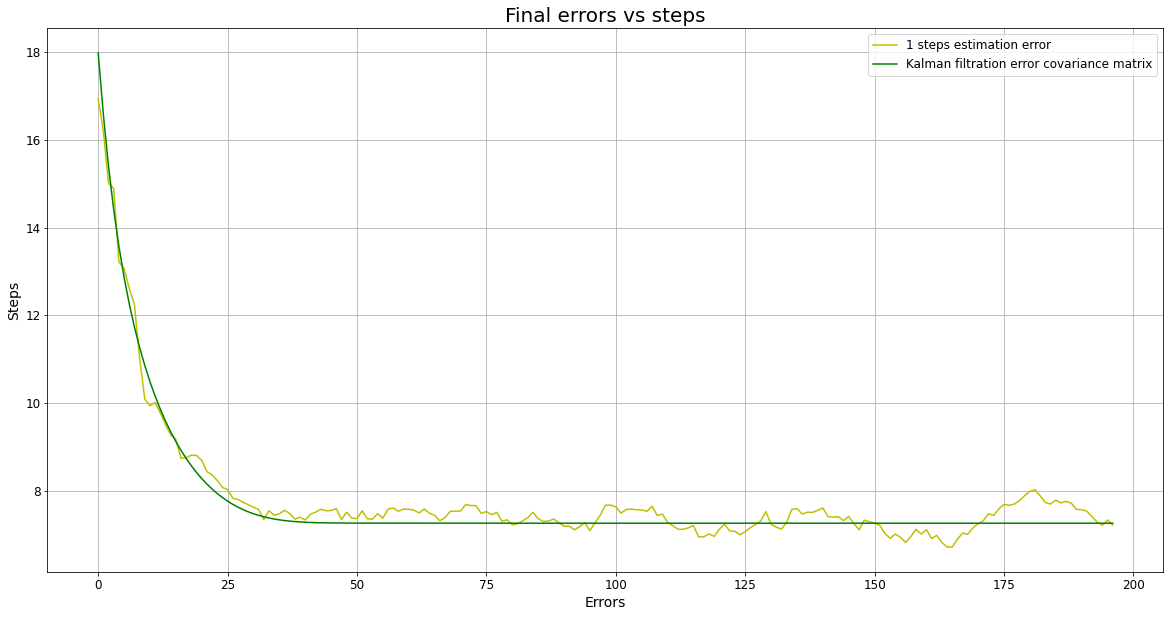

In [30]:
fig, p = plt.subplots(figsize=(20,10))
p.set_title("Final errors vs steps", fontsize = 20)
p.set_xlabel("Errors", fontsize = 14)
p.set_ylabel("Steps", fontsize = 14)
p.plot(Final_err15[0, 3:], label = "1 steps estimation error", color = "y")
p.plot(np.sqrt(P15_[0, 0, 3 :]), label = "Kalman filtration error covariance matrix", color = "g")
p.tick_params(labelsize = 12)
p.legend(fontsize = 12)
p.grid()

In [31]:
#Underestimated filter gain 𝐾
K_steady_state = K15[:,-1]
K_under = K_steady_state / 5

In [32]:
#Analyze the sensitivity of filter to understand non-optimal filter gain K.
#Generate a trajectory with variance of state noise 0.2
N = 200
M = 500

Error15_2 = np.zeros((2, N, M))

for k in range(M):

    # Initialization of arrays
    x15_2 = np.zeros((N, 1))
    V15_2 = np.zeros((N, 1))
    z15_2 = np.zeros((N, 1))

    x15_2[0] = 5
    V15_2[0] = 1
    T15_2 = 1

    # Variances
    sigma_a2 = 0.2 ** 2
    sigma_eta2 = 20 ** 2

    # Generation of normally distributed random noises with zero mathematical expectation and corresponding variances
    a15_2 = np.random.normal(0, np.sqrt(sigma_a2), N - 1)
    eta15_2 = np.random.normal(0, np.sqrt(sigma_et2), N)

    # Generation of arrays
    for i in range(1, len(V10)):
        V15_2[i] = V15_2[i - 1] + a15_2[i - 1] * T15_2
        x15_2[i] = x15_2[i - 1] + V15_2[i - 1] * T15_2 + a15_2[i - 1] * (T15_2 ** 2) / 2
        z15_2[i] = x15_2[i] + eta15_2[i]
        
    #Transition matrix 
    phi15_2 = np.array([[1, T15_2], [0, 1]])
    #Input matrix
    G15_2 = np.array([[(T15_2 ** 2) / 2], [T15_2]])
    #Observation matrix
    H15_2 = np.array([1, 0])
    #Measurement of coordinate
    Z15_2 = np.zeros((2, N))
    #State vector
    X15_2 = np.array([[5], [1]])

    X15_2_ = X15_2
    # Generation of true trajectory X
    for i in range(1, len(a15) + 1):
        X15_2 = np.hstack((X15_2, phi15_2.dot(X15_2_) + G15_2 * a15_2[i - 1]))
        X15_2_ = phi15_2.dot(X15_2_) + G15_2 * a15_2[i - 1]
        
    #Covariance matrix Q of state noise
    Q15_2 = G15_2 * G15_2.T * sigma_a2
    #Covariance matrix R of measurements noise
    R15_2 = sigma_et2
    
    #Prediction error covariance matrix
    P15_2_1 = np.zeros((2, 2, N))
    X15_2_1 = np.zeros((2, N))
    
    #Filtration error covariance matrix
    P15_2_ = np.zeros((2, 2, N))
    P15_2_[:, :, 0] = [[10000, 0], [0, 10000]]
    #Improved estimate
    X15_2_ = np.zeros((2, N))
    X15_2_[:, 0] = [100, 5]

    HT15_2 = H15_2.T
    #Filter gain, weight of residual
    K15_2 = np.zeros((2, N))

    for i in range(1, N):
        P15_2_1[:, :, i] = (phi15_2.dot(P15_2_[:, :, i - 1])).dot(phi15_2.T) + Q15_2

        X15_2_1[:, i] = phi15_2.dot(X15_2_[:, i - 1].reshape(2, 1)).reshape(2)
        K15_2[:, i] = K_under

        X15_2_[:, i] = X15_2_1[:, i] + K15_2[:, i] * (z15_2[i] - H15_2.dot(X15_2_1[:, i]))
        P15_2_[:, :, i] = P15_2_1[:, :, i] - (K15_2[:, i].reshape(2, 1) * H15_2).dot(P15_2_1[:, :, i])

    K15_2 = np.delete(K15_2, 0, axis = 1)
    
    Error15_2[:, :, k] = (X15_2 - X15_2_) ** 2
    
Final_err15_2 = np.sqrt(np.sum(Error15_2, axis = 2) / (M - 1))

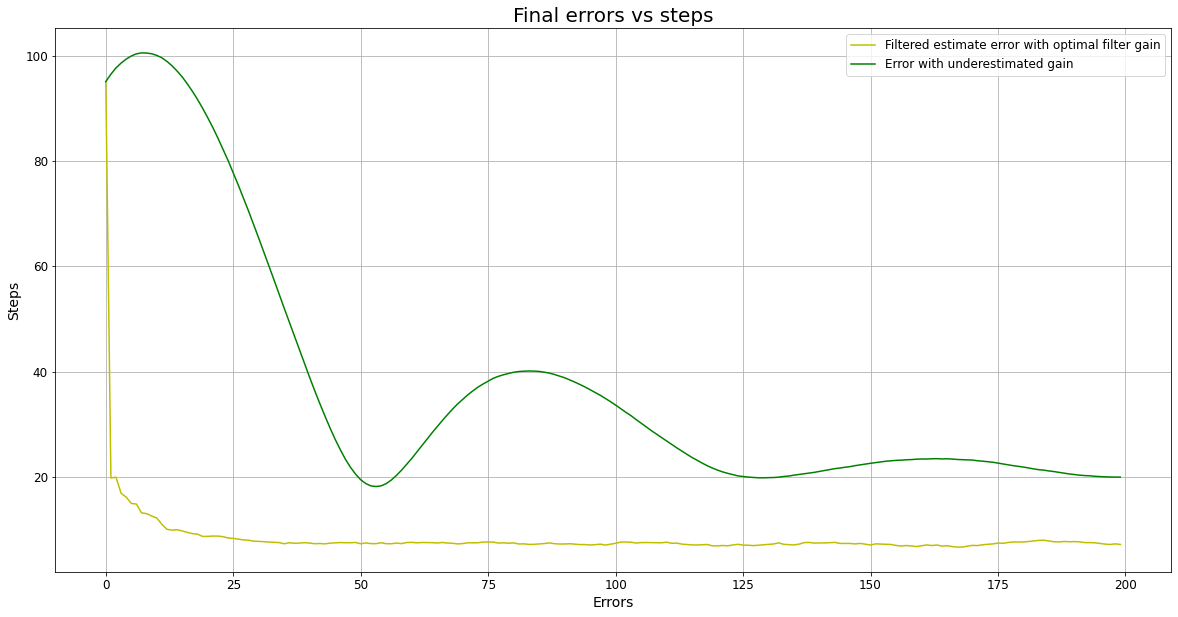

In [33]:
fig, q = plt.subplots(figsize=(20,10))
q.set_title("Final errors vs steps", fontsize = 20)
q.set_xlabel("Errors", fontsize = 14)
q.set_ylabel("Steps", fontsize = 14)
q.plot(Final_err15[0,:], label = "Filtered estimate error with optimal filter gain", color = "y")
q.plot(Final_err15_2[0,:], label = "Error with underestimated gain", color = "g")
q.tick_params(labelsize = 12)
q.legend(fontsize = 12)
q.grid()